# Indexing.

In [ ]:
!pip install pypdf --quiet # -> to load pdf file.
!pip install doc2txt --quiet # -> to load doc2txt file.
!pip install langchain --quiet # -> load pdf file
!pip install langchain-community --quiet
!pip install docx2txt --quiet
!pip install chromadb --quiet

## Download file example.

## 1. Data Loading

## Loading PyPDFLoader.

In [ ]:
#Download file example
!gdown 1y9O2EPwXrU4BsIwSUQ6nLmQxXN265Q55

Downloading...
From: https://drive.google.com/uc?id=1y9O2EPwXrU4BsIwSUQ6nLmQxXN265Q55
To: /content/Introduction_to_Data_and_Data_Science.pdf
100% 104k/104k [00:00<00:00, 81.8MB/s]


In [ ]:
# from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyPDFLoader
loader_pdf = PyPDFLoader("/content/Introduction_to_Data_and_Data_Science.pdf")

In [ ]:
pages_pdf = loader_pdf.load() # -> read and process content.

In [ ]:
# Store metadata of the text task.

In [ ]:
import copy

# copies the object and all nested objects recursively
pages_pdf_cut = copy.deepcopy(pages_pdf)

In [ ]:
# Looks hown the pdf in group  is change.join all the list of charatering.
' '.join(pages_pdf_cut[0].page_content.split())

'Analysis vs Analytics Alright! So… Let’s discuss the not-so-obvious differences between the terms analysis and analytics. Due to the similarity of the words, some people believe they share the same meaning, and thus use them interchangeably. Technically, this isn’t correct. There is, in fact, a distinct difference between the two. And the reason for one often being used instead of the other is the lack of a transparent understanding of both. So, let’s clear this up, shall we? First, we will start with analysis. Consider the following… You have a huge dataset containing data of various types. Instead of tackling the entire dataset and running the risk of becoming overwhelmed, you separate it into easier to digest chunks and study them individually and examine how they relate to other parts. And that’s analysis in a nutshell. One important thing to remember, however, is that you perform analyses on things that have already happened in the past. Such as using an analysis to explain how a

In [ ]:
# Clean text.
for i in pages_pdf_cut:
    i.page_content = ' '.join(i.page_content.split())

In [ ]:
pages_pdf_cut[0]

Document(metadata={'producer': 'Microsoft® Word for Microsoft 365', 'creator': 'Microsoft® Word for Microsoft 365', 'creationdate': '2023-11-09T10:16:34+02:00', 'author': 'Hristina  Hristova', 'moddate': '2023-11-09T10:16:34+02:00', 'source': '/content/Introduction_to_Data_and_Data_Science.pdf', 'total_pages': 6, 'page': 0, 'page_label': '1'}, page_content='Analysis vs Analytics Alright! So… Let’s discuss the not-so-obvious differences between the terms analysis and analytics. Due to the similarity of the words, some people believe they share the same meaning, and thus use them interchangeably. Technically, this isn’t correct. There is, in fact, a distinct difference between the two. And the reason for one often being used instead of the other is the lack of a transparent understanding of both. So, let’s clear this up, shall we? First, we will start with analysis. Consider the following… You have a huge dataset containing data of various types. Instead of tackling the entire dataset an

## Let's check tokenizer of each pages. estimate a toke file.

https://platform.openai.com/tokenizer

Loading by Docx2txtLoader.

In [ ]:
from langchain_community.document_loaders import Docx2txtLoader

In [ ]:
!gdown 1hDWoSohAj0IPcX_KmnuvbUoM6scoUC8q

Downloading...
From: https://drive.google.com/uc?id=1hDWoSohAj0IPcX_KmnuvbUoM6scoUC8q
To: /content/Introduction_to_Data_and_Data_Science.docx
100% 18.4k/18.4k [00:00<00:00, 38.5MB/s]


In [ ]:
loader_docx = Docx2txtLoader("/content/Introduction_to_Data_and_Data_Science.docx")

In [ ]:
pages_docx = loader_docx.load()

In [ ]:
len(pages_docx[0].page_content)

8262

## 2. Data Splitting.

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

In [ ]:
# devicer data with num of characters are 500 and no overlap between them.
char_splitter = CharacterTextSplitter(separator= "",
                                              chunk_size = 500,
                                              chunk_overlap = 0)


In [ ]:
# loading docx file example
pages = loader_docx.load()

In [ ]:
pages_char_split = char_splitter.split_documents(pages)

In [ ]:
# let's check lens of page of char split.
len(pages_char_split)

17

In [ ]:
len(pages_docx[0].page_content) / 500

16.524

## let's test with overlap


In [ ]:
# devicer data with num of characters are 500 and no overlap between them.
char_splitter_overl = CharacterTextSplitter(separator= "",
                                              chunk_size = 500,
                                              chunk_overlap = 50)

In [ ]:
pages_char_split_overl = char_splitter_overl.split_documents(pages)

In [ ]:
# let's check lens of page of char split.
len(pages_char_split_overl)

19

## character more offer.

## Split with markdown header text splitter.

In [ ]:
!gdown 172jJkJr1rDwRAj_9BCRiEX4HGsRSHonM

Downloading...
From: https://drive.google.com/uc?id=172jJkJr1rDwRAj_9BCRiEX4HGsRSHonM
To: /content/Introduction_to_Data_and_Data_Science_2.docx
100% 18.6k/18.6k [00:00<00:00, 30.8MB/s]


In [ ]:
from langchain_community.document_loaders import Docx2txtLoader
from langchain_text_splitters.markdown import MarkdownHeaderTextSplitter


In [ ]:
loader_docx = Docx2txtLoader("/content/Introduction_to_Data_and_Data_Science_2.docx")

In [ ]:
pages = loader_docx.load()

In [ ]:
pages

[Document(metadata={'source': '/content/Introduction_to_Data_and_Data_Science_2.docx'}, page_content="# Introduction to Data and Data Science\n\n## Analysis vs Analytics\n\nAlright! So…\nLet’s discuss the not-so-obvious differences\nbetween the terms analysis and analytics.\nDue to the similarity of the words, some people\nbelieve they share the same meaning, and thus\nuse them interchangeably. Technically, this\nisn’t correct. There is, in fact, a distinct\ndifference between the two. And the reason\nfor one often being used instead of the other\nis the lack of a transparent understanding\nof both.\nSo, let’s clear this up, shall we?\nFirst, we will start with analysis.\nConsider the following…\nYou have a huge dataset containing data of\nvarious types. Instead of tackling the entire\ndataset and running the risk of becoming overwhelmed,\nyou separate it into easier to digest chunks\nand study them individually and examine how\nthey relate to other parts. And that’s analysis\nin a nut

In [ ]:
## Using Mardown HeaderTextSplitter() to splitter the classes.
md_splitter = MarkdownHeaderTextSplitter(headers_to_split_on= [("#", "Course Title"),
                                                               ("##", "Lecture Title")])

In [ ]:
pages_md_split = md_splitter.split_text(pages[0].page_content)

## that would be splitter two of document each document come with a page content and a metadata parameter.

In [ ]:
pages_md_split

[Document(metadata={'Course Title': 'Introduction to Data and Data Science', 'Lecture Title': 'Analysis vs Analytics'}, page_content="Alright! So…\nLet’s discuss the not-so-obvious differences\nbetween the terms analysis and analytics.\nDue to the similarity of the words, some people\nbelieve they share the same meaning, and thus\nuse them interchangeably. Technically, this\nisn’t correct. There is, in fact, a distinct\ndifference between the two. And the reason\nfor one often being used instead of the other\nis the lack of a transparent understanding\nof both.\nSo, let’s clear this up, shall we?\nFirst, we will start with analysis.\nConsider the following…\nYou have a huge dataset containing data of\nvarious types. Instead of tackling the entire\ndataset and running the risk of becoming overwhelmed,\nyou separate it into easier to digest chunks\nand study them individually and examine how\nthey relate to other parts. And that’s analysis\nin a nutshell.\nOne important thing to remember

## Text Embedding.

In [ ]:
# import google API key for text embedding.
import getpass
import os

if not os.getenv("GOOGLE_API_KEY"):
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google API key: ")

In [ ]:
%pip install --upgrade --quiet  langchain-google-genai

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embedding = GoogleGenerativeAIEmbeddings(model="text-embedding-004")
vector1 = embedding.embed_query(pages_char_split[3].page_content)
vector2 = embedding.embed_query(pages_char_split[5].page_content)
vector3 = embedding.embed_query(pages_char_split[9].page_content)

In [ ]:
len(vector1)

768

In [ ]:
len(vector2)

768

In [ ]:
# check the cosine similarity between two of them.
import numpy as np
np.dot(vector1, vector2)

np.float64(0.8663703837661527)

In [ ]:
np.linalg.norm(vector1)

np.float64(0.9999947611040438)

## Document storing.


In [ ]:
from langchain_community.vectorstores import Chroma

In [ ]:
vectorstore = Chroma.from_documents(documents = pages_char_split,
                                    embedding = embedding,
                                    persist_directory = "./intro-to-ds-lectures")

In [ ]:
vectorstore_from_directory = Chroma(persist_directory = "./intro-to-ds-lectures", # canbe updated, or new ones can be added
                                    embedding_function = embedding) # Use to maintain consistency and accuracy in the representation of existing document.

## Add documents , Updatedocuments , del|ete document.

In [ ]:
vectorstore_from_directory.get(ids = "6243adfd-299a-4a2c-81e6-091b0254b1c8",include = ["embeddings"])

{'ids': [],
 'embeddings': array([], dtype=float64),
 'documents': None,
 'uris': None,
 'included': ['embeddings'],
 'data': None,
 'metadatas': None}

In [ ]:
from langchain_core.documents import Document

added_document = Document(page_content='Alright! So… Let’s discuss the not-so-obvious differences between the terms analysis and analytics. Due to the similarity of the words, some people believe they share the same meaning, and thus use them interchangeably. Technically, this isn’t correct. There is, in fact, a distinct difference between the two. And the reason for one often being used instead of the other is the lack of a transparent understanding of both. So, let’s clear this up, shall we? First, we will start with analysis',
                          metadata={'Course Title': 'Introduction to Data and Data Science',
                                    'Lecture Title': 'Analysis vs Analytics'})

In [ ]:
vectorstore_from_directory.add_documents([added_document])

['70fe8743-7f28-4684-838b-08d41721808c']

In [ ]:
vectorstore_from_directory.get("55409552-1943-4892-949a-3b475ff9c840")

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

In [ ]:
updated_document = Document(page_content='Great! We hope we gave you a good idea about the level of applicability of the most frequently used programming and software tools in the field of data science. Thank you for watching!',
                            metadata={'Course Title': 'Introduction to Data and Data Science',
                                     'Lecture Title': 'Programming Languages & Software Employed in Data Science - All the Tools You Need'})

In [ ]:
vectorstore_from_directory.update_document(document_id = "55409552-1943-4892-949a-3b475ff9c840",
                                           document = updated_document)

In [ ]:
vectorstore_from_directory.get("55409552-1943-4892-949a-3b475ff9c840")

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

In [ ]:
vectorstore_from_directory.delete("55409552-1943-4892-949a-3b475ff9c840")

In [ ]:
vectorstore_from_directory.get("55409552-1943-4892-949a-3b475ff9c840")

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

## 3. Retrival document Similarity search.

In [ ]:
added_document = Document(page_content='Alright! So… How are the techniques used in data, business intelligence, or predictive analytics applied in real life? Certainly, with the help of computers. You can basically split the relevant tools into two categories—programming languages and software. Knowing a programming language enables you to devise programs that can execute specific operations. Moreover, you can reuse these programs whenever you need to execute the same action',
                          metadata={'Course Title': 'Introduction to Data and Data Science',
                                    'Lecture Title': 'Programming Languages & Software Employed in Data Science - All the Tools You Need'})

In [ ]:
vectorstore.add_documents([added_document])

['c022eb60-f583-4451-b5fb-7d1f20b436b7']

In [ ]:
question = "What language do data scientists use?"

In [ ]:

retrieved_docs = vectorstore.similarity_search(query = question,
                                               k = 5)

In [ ]:
retrieved_docs

[Document(metadata={'source': '/content/Introduction_to_Data_and_Data_Science.docx'}, page_content='way, R, Python, and MATLAB, combined\nwith SQL, cover most of the tools used when\nworking with traditional data, BI, and conventional\ndata science.\nWhat about big data?\nApart from R and Python, people working in\nthis area are often proficient in other languages\nlike Java or Scala. These two have not been\ndeveloped specifically for doing statistical\nanalyses, however they turn out to be very\nuseful when combining data from multiple sources.\nAll right! Let’s finish off with machine\nlearning.\nWhen'),
 Document(metadata={'source': '/content/Introduction_to_Data_and_Data_Science.docx'}, page_content='way, R, Python, and MATLAB, combined\nwith SQL, cover most of the tools used when\nworking with traditional data, BI, and conventional\ndata science.\nWhat about big data?\nApart from R and Python, people working in\nthis area are often proficient in other languages\nlike Java or Scal

###  Retrivel similar search.

In [ ]:
for i in retrieved_docs:
    print(f"Page Content: {i.page_content}")


Page Content: way, R, Python, and MATLAB, combined
with SQL, cover most of the tools used when
working with traditional data, BI, and conventional
data science.
What about big data?
Apart from R and Python, people working in
this area are often proficient in other languages
like Java or Scala. These two have not been
developed specifically for doing statistical
analyses, however they turn out to be very
useful when combining data from multiple sources.
All right! Let’s finish off with machine
learning.
When
Page Content: way, R, Python, and MATLAB, combined
with SQL, cover most of the tools used when
working with traditional data, BI, and conventional
data science.
What about big data?
Apart from R and Python, people working in
this area are often proficient in other languages
like Java or Scala. These two have not been
developed specifically for doing statistical
analyses, however they turn out to be very
useful when combining data from multiple sources.
All right! Let’s finish off wi

### Retrieval: Maximal Marginal Relevance (MMR) search ( sovle duplicated )  Redundancy is calculated as the maximum similarity between a new candidate document (or information) and the already retrieved documents.

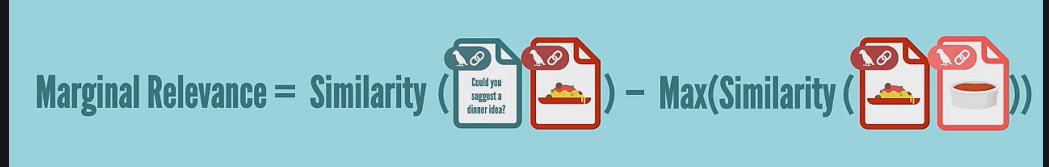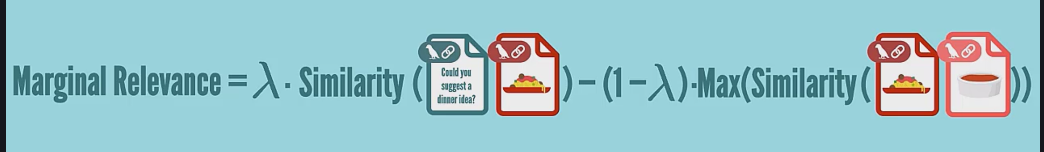

In [ ]:
question2 = "which software datascience use?"

In [ ]:
retrieved_docs2 = vectorstore.max_marginal_relevance_search(
    query=question2,
    k=5,
    lambda_mult = 1,
    filter = {"Lecture Title": "Programming Languages & Software Employed in Data Science - All the Tools You Need"}
)

In [ ]:
for l in retrieved_docs2:
    print(f"Page Content: {l.page_content} \n")


Page Content: Alright! So… How are the techniques used in data, business intelligence, or predictive analytics applied in real life? Certainly, with the help of computers. You can basically split the relevant tools into two categories—programming languages and software. Knowing a programming language enables you to devise programs that can execute specific operations. Moreover, you can reuse these programs whenever you need to execute the same action 

Page Content: Alright! So… How are the techniques used in data, business intelligence, or predictive analytics applied in real life? Certainly, with the help of computers. You can basically split the relevant tools into two categories—programming languages and software. Knowing a programming language enables you to devise programs that can execute specific operations. Moreover, you can reuse these programs whenever you need to execute the same action 

Page Content: Alright! So… How are the techniques used in data, business intelligence,

### Backend retrivel.

In [ ]:
# Demonstrate how to create a runable retrival object.
len(vectorstore.get()['documents'])

59

In [ ]:
retriever = vectorstore.as_retriever(search_type = 'mmr', #  Maximal Marginal Relevance
                                     search_kwargs = {'k': 3,
                                                      'lambda_mult': 0.7})

In [ ]:
retriever

VectorStoreRetriever(tags=['Chroma', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x78c37bb481d0>, search_type='mmr', search_kwargs={'k': 3, 'lambda_mult': 0.7})

In [ ]:
question = "What software do data scientists use?"

In [ ]:
retrieved_docs = retriever.invoke(question)

In [ ]:
retrieved_docs

[Document(metadata={'source': '/content/Introduction_to_Data_and_Data_Science.docx'}, page_content='freedom\nto create specific, ad-hoc tools for each\nproject you are working on.\nGreat!\nWe hope we gave you a good idea about the\nlevel of applicability of the most frequently\nused programming and software tools in the\nfield of data science.\nThank you for watching!'),
 Document(metadata={'source': '/content/Introduction_to_Data_and_Data_Science.docx'}, page_content='ters.\nYou can basically split the relevant tools\ninto two categories—programming languages\nand software.\nKnowing a programming language enables you\nto devise programs that can execute specific\noperations. Moreover, you can reuse these\nprograms whenever you need to execute the\nsame action.\nAs you can see from the infographic, R, and\nPython are the two most popular tools across\nall columns. Their biggest advantage is that\nthey can manipulate data and are integrated\nwithin multiple data and data sc'),
 Document

In [ ]:
for i in retrieved_docs:
    print(f"Page Content: {i.page_content}\n")

Page Content: freedom
to create specific, ad-hoc tools for each
project you are working on.
Great!
We hope we gave you a good idea about the
level of applicability of the most frequently
used programming and software tools in the
field of data science.
Thank you for watching!

Page Content: ters.
You can basically split the relevant tools
into two categories—programming languages
and software.
Knowing a programming language enables you
to devise programs that can execute specific
operations. Moreover, you can reuse these
programs whenever you need to execute the
same action.
As you can see from the infographic, R, and
Python are the two most popular tools across
all columns. Their biggest advantage is that
they can manipulate data and are integrated
within multiple data and data sc

Page Content: justed for specific business needs.
Their smaller scope does not make them less
useful, in fact, just the opposite—they
are a lot easier to learn and be adopted by
others. You have already hea

In [ ]:
retriever = vectorstore.as_retriever(search_type = 'mmr',
                                     search_kwargs = {'k':3,
                                                      'lambda_mult':0.7})

In [ ]:
from langchain.prompts import PromptTemplate

TEMPLATE = '''
Answer the following question:
{question}

To answer the question, use only the following context:
{context}

At the end of the response, specify the name of the lecture this context is taken from in the format:
Resources: *Lecture Title*
where *Lecture Title* should be substituted with the title of all resource lectures.
'''

prompt_template = PromptTemplate.from_template(TEMPLATE)

In [ ]:
from google import generativeai as genai

# Access the API key from Colab secrets
import google.colab.userdata as userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

genai.configure(api_key=GEMINI_API_KEY)
chat = genai.GenerativeModel(model_name="gemini-2.5-flash")


In [ ]:
from google import genai

# The client gets the API key from the environment variable `GEMINI_API_KEY`.
client = genai.Client()

In [ ]:
import os
import google.colab.userdata as userdata

# Access the API key from Colab secrets and set as environment variable
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

from google.generativeai import GenerativeModel

chat = GenerativeModel(model_name="gemini-2.5-flash")

In [ ]:
from langchain.schema.runnable import RunnablePassthrough
response = client.models.generate_content(
    model="gemini-2.5-flash", contents="Explain how AI works in a few words"
)
print(response.text)


AI learns patterns from data to make predictions or decisions.


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

chat = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [ ]:

from langchain.schema.output_parser import StrOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI

chat = ChatGoogleGenerativeAI(model="gemini-2.5-flash") # Use the LangChain wrapper
question = "What language do data scientists use?"
chain = ({'context': retriever,
         'question': RunnablePassthrough()}
         | prompt_template
         | chat
         | StrOutputParser())

In [ ]:
chain.invoke(question)

'Data scientists use R, Python, MATLAB, and SQL. For those working with big data, Java and Scala are also often used.\n\nResources: Programming Languages & Software Employed in Data Science - All the Tools You Need'

In [ ]:
print('Data scientists use a variety of software tools. R and Python are the two most popular tools as they can manipulate data and are integrated within multiple data and data science software platforms. They are adaptable and can solve a wide range of business and data-related problems. Hadoop is a software framework designed to handle the complexity and computational intensity of big data by distributing computational tasks on multiple computers. Additionally, Power BI, SaS, Qlik, and Tableau are top-notch examples of software designed for business intelligence visualizations.\n\nResources: Programming Languages & Software Employed in Data Science - All the Tools You Need')

Data scientists use a variety of software tools. R and Python are the two most popular tools as they can manipulate data and are integrated within multiple data and data science software platforms. They are adaptable and can solve a wide range of business and data-related problems. Hadoop is a software framework designed to handle the complexity and computational intensity of big data by distributing computational tasks on multiple computers. Additionally, Power BI, SaS, Qlik, and Tableau are top-notch examples of software designed for business intelligence visualizations.

Resources: Programming Languages & Software Employed in Data Science - All the Tools You Need
